In [2]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [ ]:
baseline_K_val = [1, 4, 8]
SUBJECT = "Carlson"

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.TremorModelTrainer(config, subject=SUBJECT)
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../../Results/Results_Carlson/Baseline_results_train_with_{K}data_C.csv')
# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/12 - Session Exp_2025-06-30-v1/E9AD0E7DCC2B/
(8493, 4, 14, 1) (8493,) (86, 4, 14, 1) (86,)
Dataset 2/12 - Session Exp_2025-06-30-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...


In [5]:
b_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce'
baseline_K = ['1', '4', '8']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Results_Carlson/Baseline_results_train_with_{K}data_C.csv')

In [ ]:
import Target

prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)

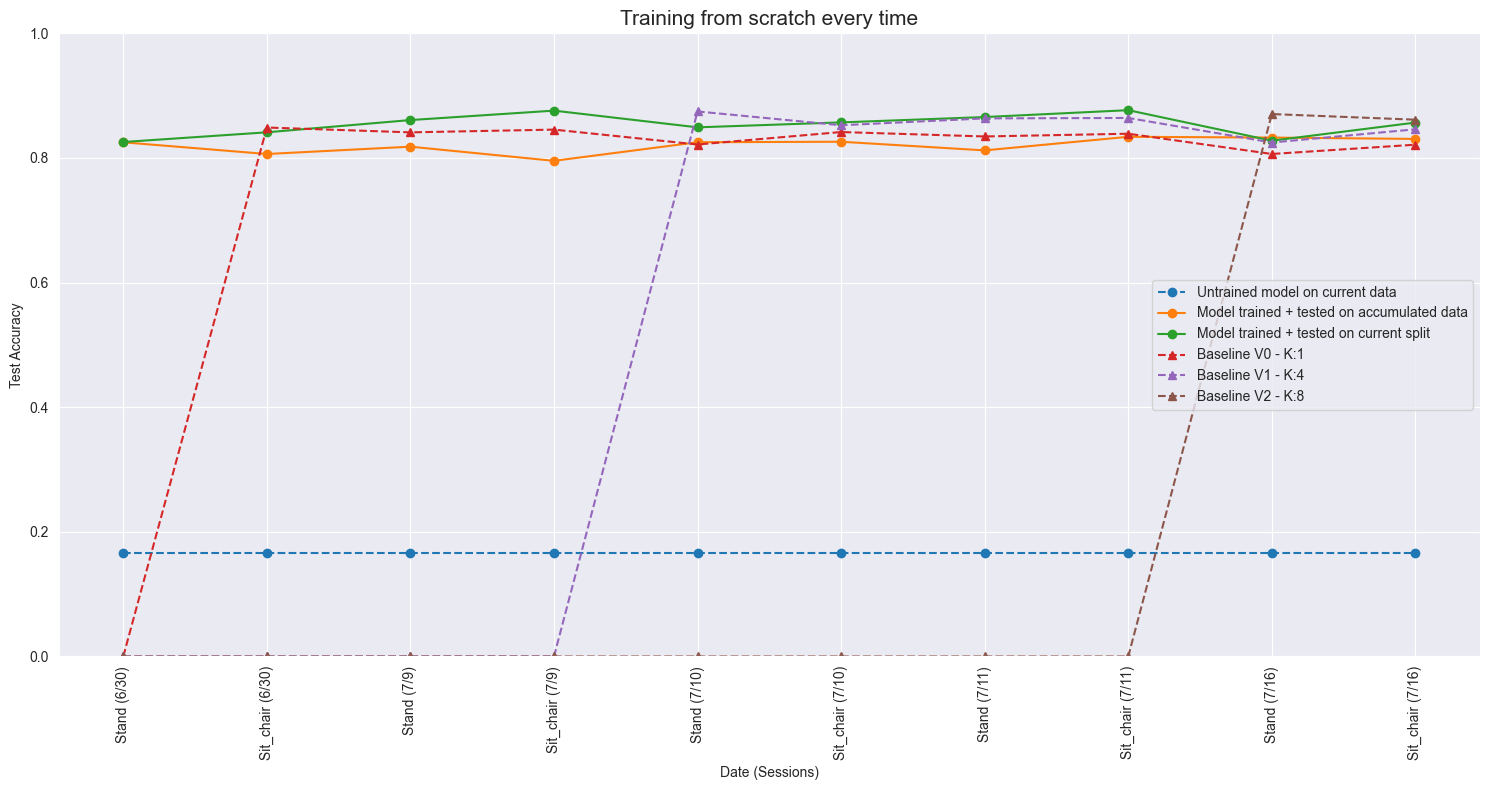

Average of acc without training anything (should be random): 11.92%
Average of acc using previous test data after training: 85.37%
Average of acc using current test data after training: 82.06%
Baseline K-1: 83.33%
Baseline K-4: 85.43%
Baseline K-8: 86.59%


In [6]:
prog_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")